In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import ast
from matplotlib import pyplot as plt

# Standard

## Rectangle

In [2]:
epsnet_sample = pd.read_csv("./epsnet/standard/epsnet_sample_results_rectangle.csv")
epsnet_disc = pd.read_csv("./epsnet/standard/epsnet_discrepancy_results_rectangle.csv")
epsnet_sketch = pd.read_csv("./epsnet/standard/epsnet_sketch_merge_results_rectangle.csv")

In [3]:
epsnet_sample["size"] = epsnet_sample["red_points"] + epsnet_sample["blue_points"]
epsnet_disc["size"] = epsnet_disc["red_points"] + epsnet_disc["blue_points"]
epsnet_sketch["size"] = epsnet_sketch["red_points"] + epsnet_sketch["blue_points"]

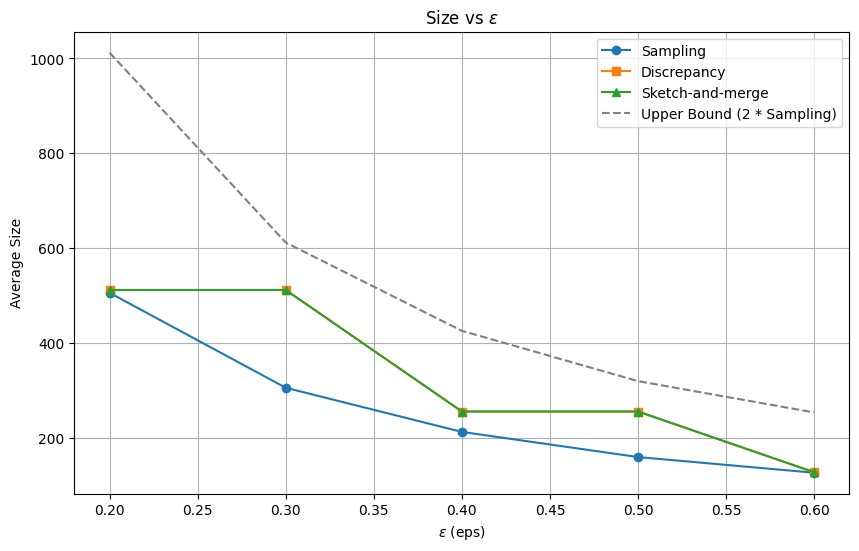

In [4]:
# Group by 'eps' and calculate the mean running time for each method
sample_grouped = epsnet_sample.groupby("eps")["size"].mean()
disc_grouped = epsnet_disc.groupby("eps")["size"].mean()
sketch_grouped = epsnet_sketch.groupby("eps")["size"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_grouped.index, sample_grouped.values, label="Sampling", marker='o')
plt.plot(disc_grouped.index, disc_grouped.values, label="Discrepancy", marker='s')
plt.plot(sketch_grouped.index, sketch_grouped.values, label="Sketch-and-merge", marker='^')

# Add the upper bound line
plt.plot(sample_grouped.index, 2 * sample_grouped.values, label="Upper Bound (2 * Sampling)", linestyle='--', color='gray')

plt.xlabel("$\epsilon$ (eps)")
plt.ylabel("Average Size")
plt.title("Size vs $\epsilon$")
plt.legend()
plt.grid(True)
plt.show()


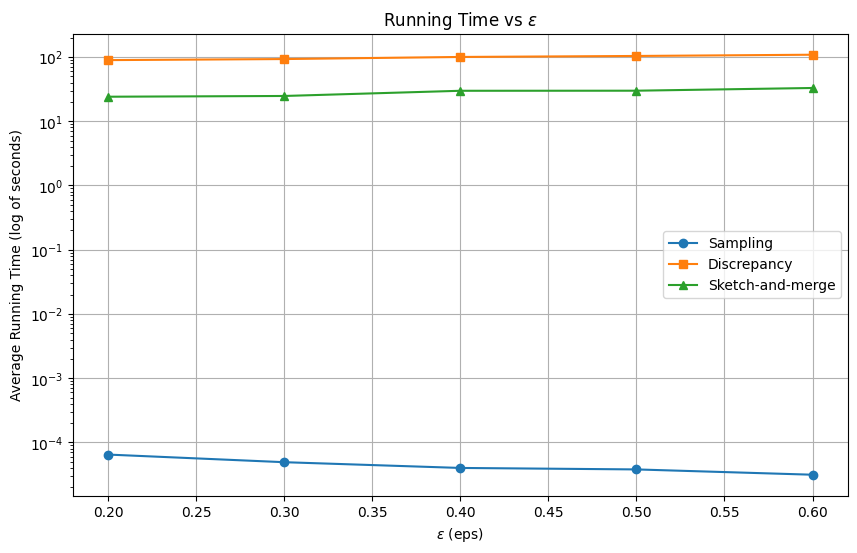

In [5]:
# Group by 'eps' and calculate the mean running time for each method
sample_time_grouped = epsnet_sample.groupby("eps")["time"].mean()
disc_time_grouped = epsnet_disc.groupby("eps")["time"].mean()
sketch_time_grouped = epsnet_sketch.groupby("eps")["time"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_time_grouped.index, sample_time_grouped.values, label="Sampling", marker='o')
plt.plot(disc_time_grouped.index, disc_time_grouped.values, label="Discrepancy", marker='s')
plt.plot(sketch_time_grouped.index, sketch_time_grouped.values, label="Sketch-and-merge", marker='^')

plt.xlabel("$\epsilon$ (eps)")
plt.ylabel("Average Running Time (log of seconds)")
plt.title("Running Time vs $\epsilon$")
plt.yscale("log")  # Set y-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

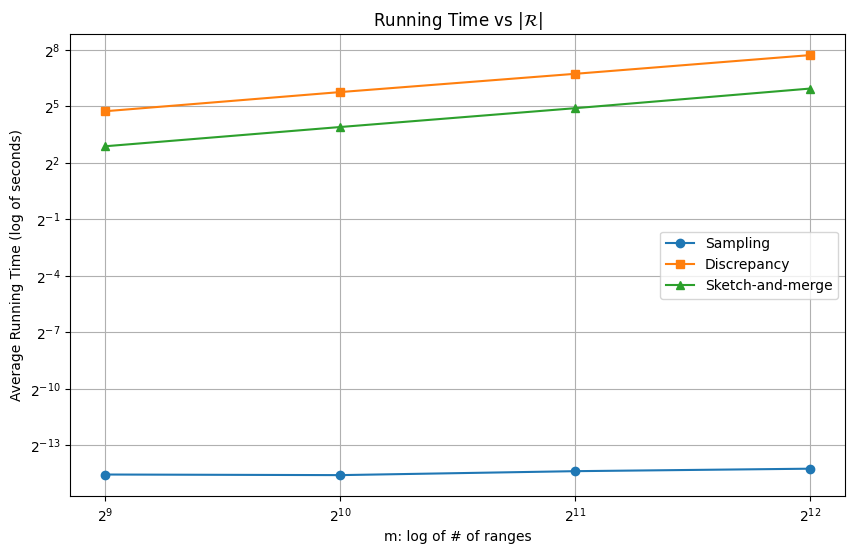

In [6]:
# Group by 'm' and calculate the mean running time for each method
sample_time_by_m = epsnet_sample.groupby("m")["time"].mean()
disc_time_by_m = epsnet_disc.groupby("m")["time"].mean()
sketch_time_by_m = epsnet_sketch.groupby("m")["time"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_time_by_m.index, sample_time_by_m.values, label="Sampling", marker='o')
plt.plot(disc_time_by_m.index, disc_time_by_m.values, label="Discrepancy", marker='s')
plt.plot(sketch_time_by_m.index, sketch_time_by_m.values, label="Sketch-and-merge", marker='^')

plt.xlabel("m: log of # of ranges")
plt.ylabel("Average Running Time (log of seconds)")
plt.title("Running Time vs $|\mathcal{R}|$")
plt.yscale("log", base=2)  # Set y-axis to log scale
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid()
plt.show()

## higher dims

In [7]:
epsnet_sample = pd.read_csv("./epsnet/standard/epsnet_sample_results_halfspace.csv")
epsnet_sketch = pd.read_csv("./epsnet/standard/epsnet_sketch_merge_results_halfspace.csv")

In [8]:
epsnet_sample["size"] = epsnet_sample["red_points"] + epsnet_sample["blue_points"]
epsnet_sketch["size"] = epsnet_sketch["red_points"] + epsnet_sketch["blue_points"]

BUG

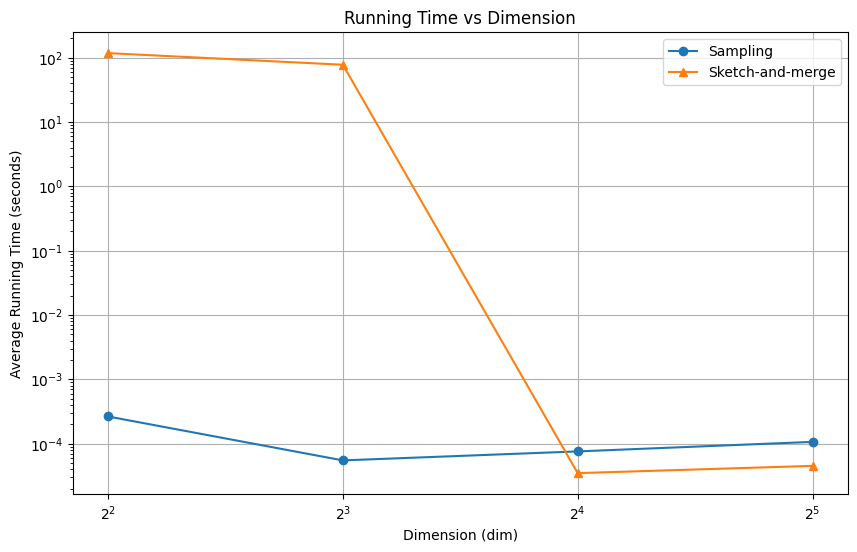

In [11]:
# Group by 'dim' and calculate the mean running time for each method
sample_time_by_dim = epsnet_sample.groupby("dim")["time"].mean()
sketch_time_by_dim = epsnet_sketch.groupby("dim")["time"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_time_by_dim.index, sample_time_by_dim.values, label="Sampling", marker='o')
plt.plot(sketch_time_by_dim.index, sketch_time_by_dim.values, label="Sketch-and-merge", marker='^')

plt.xlabel("Dimension (dim)")
plt.ylabel("Average Running Time (seconds)")
plt.title("Running Time vs Dimension")
plt.yscale("log")  # Set y-axis to log scale
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

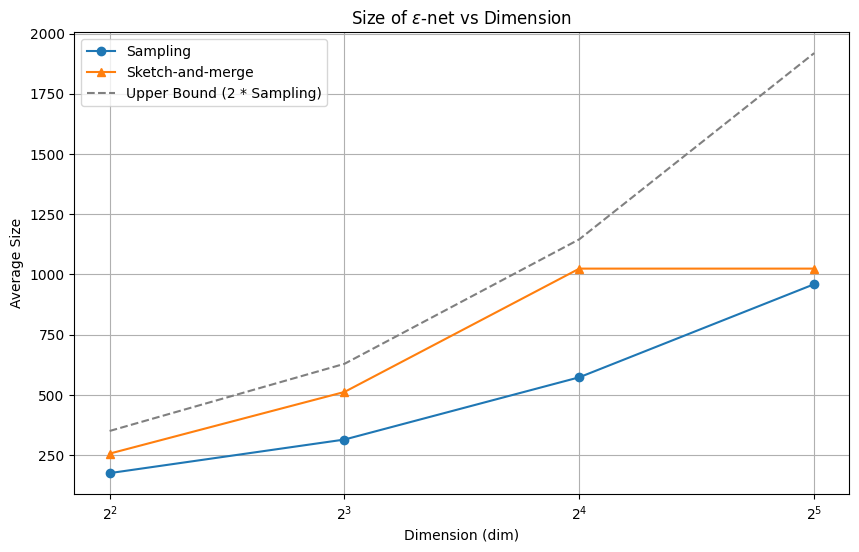

In [12]:
# Group by 'dim' and calculate the mean size for each method
sample_size_by_dim = epsnet_sample.groupby("dim")["size"].mean()
sketch_size_by_dim = epsnet_sketch.groupby("dim")["size"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_size_by_dim.index, sample_size_by_dim.values, label="Sampling", marker='o')
plt.plot(sketch_size_by_dim.index, sketch_size_by_dim.values, label="Sketch-and-merge", marker='^')

# Add the upper bound line
plt.plot(sample_size_by_dim.index, 2 * sample_size_by_dim.values, label="Upper Bound (2 * Sampling)", linestyle='--', color='gray')

plt.xlabel("Dimension (dim)")
plt.ylabel("Average Size")
plt.title("Size of $\epsilon$-net vs Dimension")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

## Hittingset:

In [13]:
hittingset_rectangle = pd.read_csv("./hittingset/standard/hittingset_results_rectangle.csv")
hittingset_halfspace = pd.read_csv("./hittingset/standard/hittingset_results_halfspace.csv")

In [14]:
hittingset_rectangle["size"] = hittingset_rectangle["red_points"] + hittingset_rectangle["blue_points"]
hittingset_halfspace["size"] = hittingset_halfspace["red_points"] + hittingset_halfspace["blue_points"]

In [15]:
hittingset_rectangle.head()

,n,m,time,success,red_points,blue_points,size
0,8192,1002,0.763424,True,2088,2951,5039
1,16384,1014,1.760958,True,2493,2784,5277
2,32768,1014,3.534835,True,2461,2627,5088
3,65536,1021,8.533629,True,2454,2807,5261
4,131072,1022,20.955985,True,1805,3443,5248


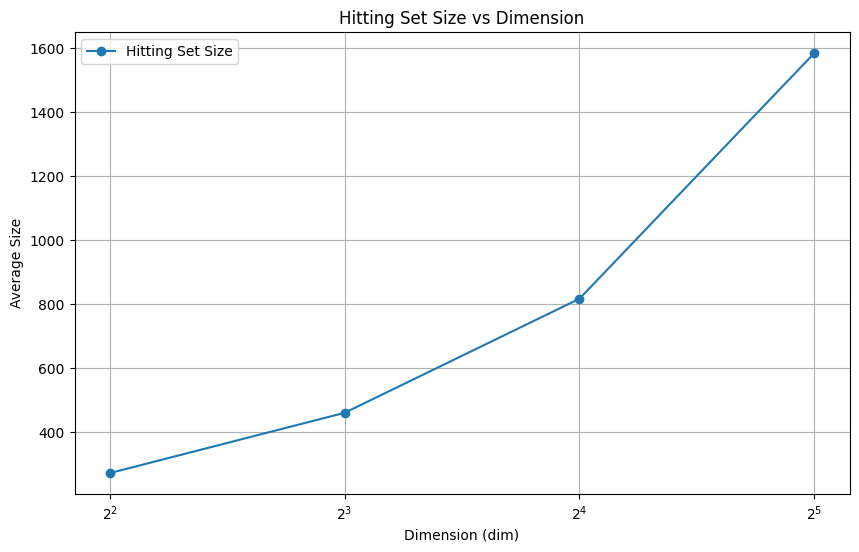

In [16]:
# Group by 'dim' and calculate the mean size for each dimension
hittingset_size_by_dim = hittingset_halfspace.groupby("dim")["size"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(hittingset_size_by_dim.index, hittingset_size_by_dim.values, label="Hitting Set Size", marker='o')

plt.xlabel("Dimension (dim)")
plt.ylabel("Average Size")
plt.title("Hitting Set Size vs Dimension")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

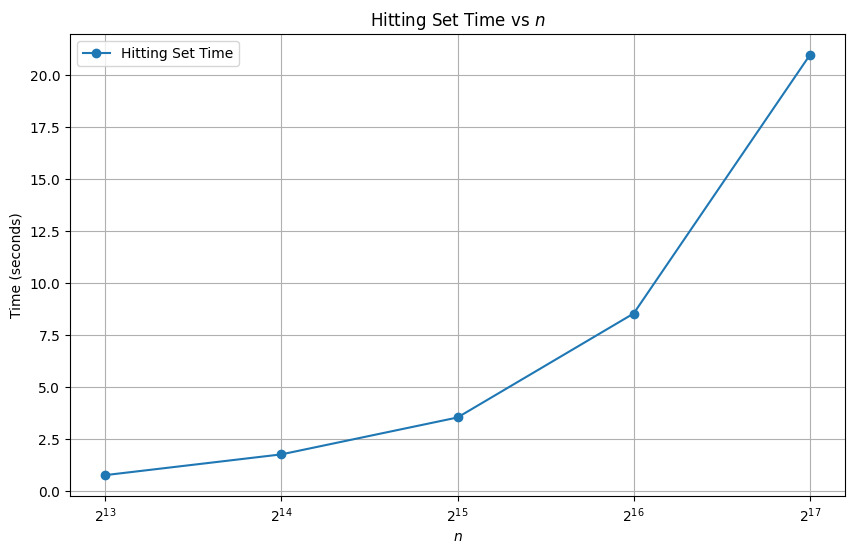

In [17]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(hittingset_rectangle["n"], hittingset_rectangle["time"], label="Hitting Set Time", marker='o')

plt.xlabel("$n$")
plt.ylabel("Time (seconds)")
plt.title("Hitting Set Time vs $n$")
plt.xscale("log", base=2)  # Set x-axis to log scale
# plt.yscale("log")  # Set y-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

# Fair

## Rectangle

In [18]:
epsnet_sample = pd.read_csv("./epsnet/fair/dp_fair_epsnet_rectangle_sample.csv")
epsnet_naive = pd.read_csv("./epsnet/fair/dp_fair_epsnet_rectangle_naive.csv")
epsnet_sketch = pd.read_csv("./epsnet/fair/dp_fair_epsnet_rectangle_sketch_merge.csv")
epsnet_unfair = pd.read_csv("./epsnet/standard/epsnet_sample_results_rectangle.csv")

In [19]:
epsnet_sample["size"] = epsnet_sample["red_points"] + epsnet_sample["blue_points"]
epsnet_naive["size"] = epsnet_naive["red_points"] + epsnet_naive["blue_points"]
epsnet_sketch["size"] = epsnet_sketch["red_points"] + epsnet_sketch["blue_points"]
epsnet_unfair["size"] = epsnet_unfair["red_points"] + epsnet_unfair["blue_points"]

In [20]:
epsnet_sample["ratios"] = epsnet_sample["ratios"].apply(ast.literal_eval)
epsnet_naive["ratios"] = epsnet_naive["ratios"].apply(ast.literal_eval)
epsnet_sketch["ratios"] = epsnet_sketch["ratios"].apply(ast.literal_eval)

In [32]:
epsnet_sample["counts"] = epsnet_sample["counts"].apply(ast.literal_eval)

In [33]:
filtered_epsnet_sample = epsnet_sample[epsnet_sample["ratios"].apply(lambda x: x == [0.5, 0.5])]
filtered_epsnet_naive = epsnet_naive[epsnet_naive["ratios"].apply(lambda x: x == [0.5, 0.5])]
filtered_epsnet_sketch = epsnet_sketch[epsnet_sketch["ratios"].apply(lambda x: x == [0.5, 0.5])]

In [22]:
def normal_distance(v, u):
    v_normalized = v / np.linalg.norm(v)
    u_normalized = u / np.linalg.norm(u)

    # Calculate the L2 distance
    l2_distance = np.linalg.norm(v_normalized - u_normalized)
    return l2_distance / len(v)

In [34]:
filtered_epsnet_sample["fairness"] = filtered_epsnet_sample.apply(
    lambda row: normal_distance(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)

filtered_epsnet_naive["fairness"] = filtered_epsnet_naive.apply(
    lambda row: normal_distance(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)

filtered_epsnet_sketch["fairness"] = filtered_epsnet_sketch.apply(
    lambda row: normal_distance(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)

epsnet_unfair["fairness"] = epsnet_unfair.apply(
    lambda row: normal_distance(np.array([0.5, 0.5]), np.array([row["red_points"], row["blue_points"]])), axis=1
)

/tmp/ipykernel_49762/3783929097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_epsnet_sample["fairness"] = filtered_epsnet_sample.apply(
/tmp/ipykernel_49762/3783929097.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_epsnet_naive["fairness"] = filtered_epsnet_naive.apply(


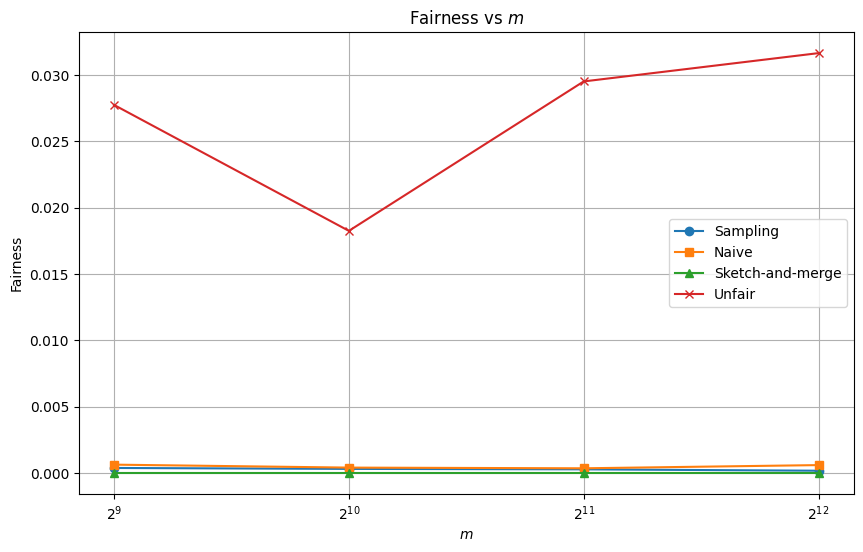

In [24]:
# Group by 'm' and calculate the mean fairness for each method
sample_fairness_by_m = filtered_epsnet_sample.groupby("m")["fairness"].mean()
naive_fairness_by_m = filtered_epsnet_naive.groupby("m")["fairness"].mean()
sketch_fairness_by_m = filtered_epsnet_sketch.groupby("m")["fairness"].mean()
unfair_fairness_by_m = epsnet_unfair.groupby("m")["fairness"].mean()

# Plot the results
plt.figure(figsize=(10, 6))

# Plot fairness vs m for each dataset
plt.plot(sample_fairness_by_m.index, sample_fairness_by_m.values, label="Sampling", marker='o')
plt.plot(naive_fairness_by_m.index, naive_fairness_by_m.values, label="Naive", marker='s')
plt.plot(sketch_fairness_by_m.index, sketch_fairness_by_m.values, label="Sketch-and-merge", marker='^')
plt.plot(unfair_fairness_by_m.index, unfair_fairness_by_m.values, label="Unfair", marker='x')

# Add labels, title, and legend
plt.xlabel("$m$")
plt.ylabel("Fairness")
plt.title("Fairness vs $m$")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

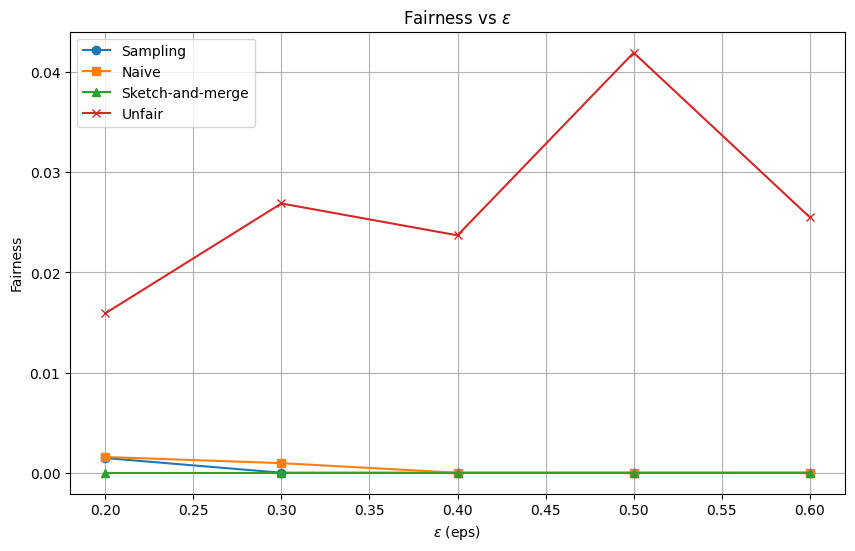

In [25]:
# Group by 'eps' and calculate the mean fairness for each method
sample_fairness_by_eps = filtered_epsnet_sample.groupby("eps")["fairness"].mean()
naive_fairness_by_eps = filtered_epsnet_naive.groupby("eps")["fairness"].mean()
sketch_fairness_by_eps = filtered_epsnet_sketch.groupby("eps")["fairness"].mean()
unfair_fairness_by_eps = epsnet_unfair.groupby("eps")["fairness"].mean()

# Plot the results
plt.figure(figsize=(10, 6))

# Plot fairness vs eps for each dataset
plt.plot(sample_fairness_by_eps.index, sample_fairness_by_eps.values, label="Sampling", marker='o')
plt.plot(naive_fairness_by_eps.index, naive_fairness_by_eps.values, label="Naive", marker='s')
plt.plot(sketch_fairness_by_eps.index, sketch_fairness_by_eps.values, label="Sketch-and-merge", marker='^')
plt.plot(unfair_fairness_by_eps.index, unfair_fairness_by_eps.values, label="Unfair", marker='x')

# Add labels, title, and legend
plt.xlabel("$\epsilon$ (eps)")
plt.ylabel("Fairness")
plt.title("Fairness vs $\epsilon$")
plt.legend()
plt.grid(True)
plt.show()

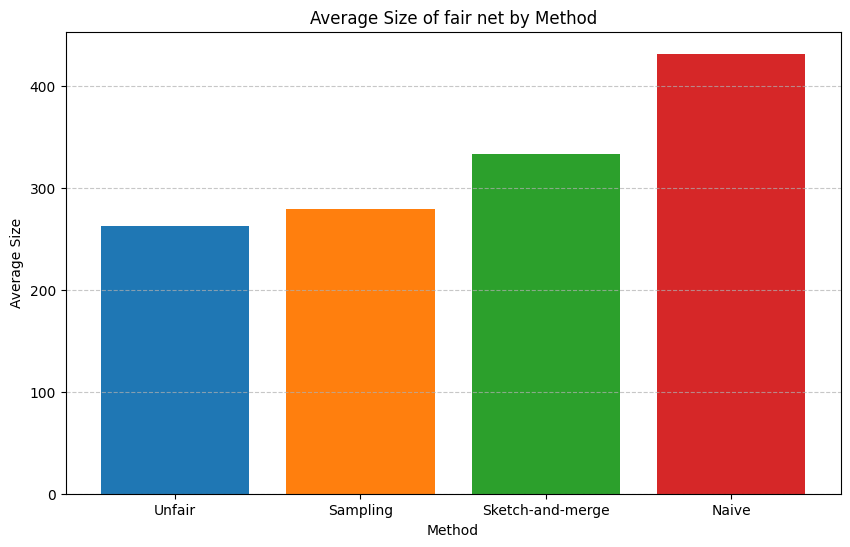

In [26]:
# Group by 'm' and calculate the mean size for each method
sample_size_by_m = epsnet_sample.groupby("m")["size"].mean()
naive_size_by_m = epsnet_naive.groupby("m")["size"].mean()
sketch_size_by_m = epsnet_sketch.groupby("m")["size"].mean()
unfair_size_by_m = epsnet_unfair.groupby("m")["size"].mean()

# Group by 'm' and calculate the mean size for each method
methods = ["Unfair", "Sampling", "Sketch-and-merge", "Naive"]
sizes = [
    unfair_size_by_m.mean(),
    sample_size_by_m.mean(),
    sketch_size_by_m.mean(),
    naive_size_by_m.mean(),
]

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(methods, sizes, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])  # Using visually distinct colors

# Add labels, title, and legend
plt.xlabel("Method")
plt.ylabel("Average Size")
plt.title("Average Size of fair net by Method")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


BUG

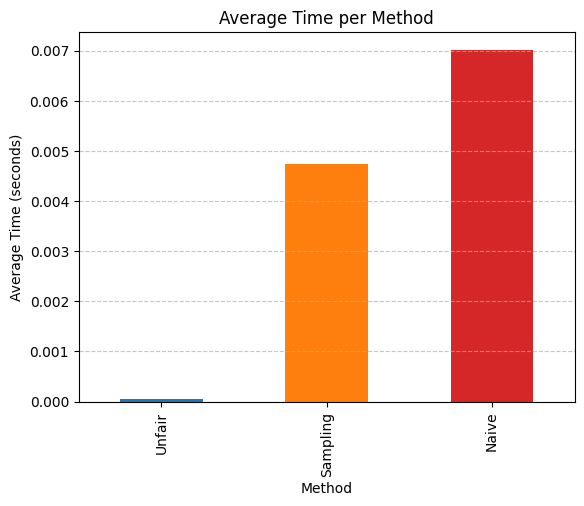

In [27]:
# Group by method and calculate the mean time for each method
methods = ["Unfair", "Sampling", "Naive"]
times = [
    epsnet_unfair["time"].mean(),
    epsnet_sample["time"].mean(),
    epsnet_naive["time"].mean(),
]

# Create a DataFrame for plotting
time_data = pd.DataFrame({"Method": methods, "Time": times})

# Plot the results
time_data.plot(x="Method", y="Time", kind="bar", color=['#1f77b4', '#ff7f0e', '#d62728'], legend=False)

# Add labels, title, and grid
plt.xlabel("Method")
plt.ylabel("Average Time (seconds)")
plt.title("Average Time per Method")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

vs k

In [35]:
filtered_equal_sample = epsnet_sample[epsnet_sample["ratios"].apply(lambda x: len(set(x)) == 1)]
filtered_equal_naive = epsnet_naive[epsnet_naive["ratios"].apply(lambda x: len(set(x)) == 1)]
filtered_equal_sketch = epsnet_sketch[epsnet_sketch["ratios"].apply(lambda x: len(set(x)) == 1)]

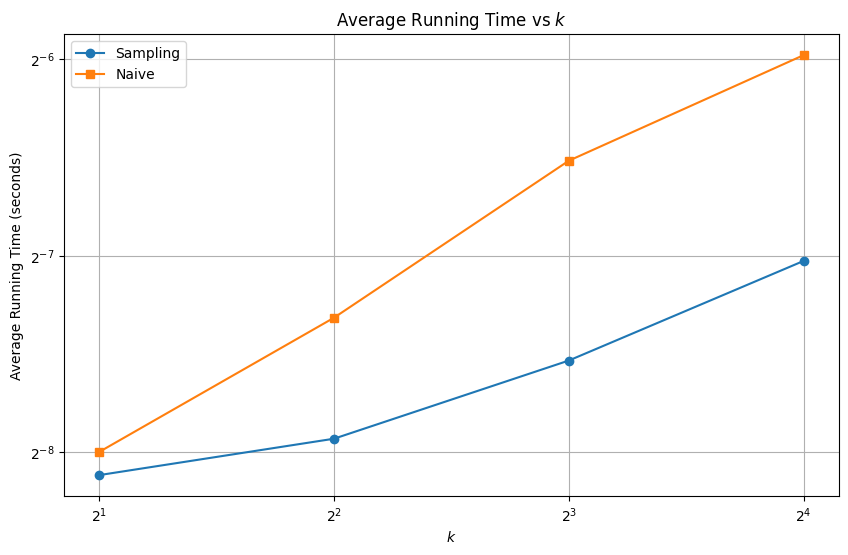

In [29]:
# Group by 'k' and calculate the mean running time for each method
sample_time_by_k = filtered_equal_sample.groupby("k")["time"].mean()
naive_time_by_k = filtered_equal_naive.groupby("k")["time"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_time_by_k.index, sample_time_by_k.values, label="Sampling", marker='o')
plt.plot(naive_time_by_k.index, naive_time_by_k.values, label="Naive", marker='s')

# Add labels, title, and legend
plt.xlabel("$k$")
plt.ylabel("Average Running Time (seconds)")
plt.title("Average Running Time vs $k$")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.yscale("log", base=2)  # Set y-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

BUG?

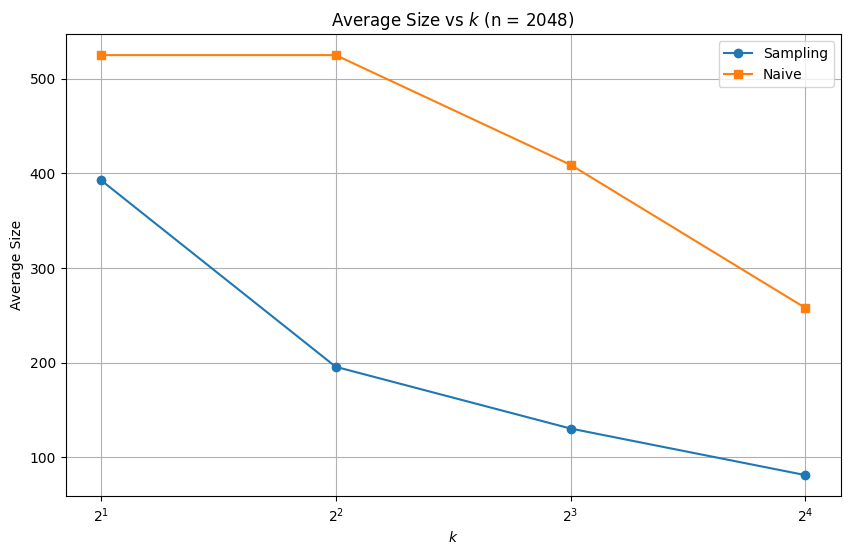

In [30]:
# Filter data for a specific value of m (e.g., m = 1024)
m_value = 2048
filtered_sample = filtered_equal_sample[filtered_equal_sample["n"] == m_value]
filtered_naive = filtered_equal_naive[filtered_equal_naive["n"] == m_value]

# Group by 'k' and calculate the mean size for each method
sample_size_by_k = filtered_sample.groupby("k")["size"].mean()
naive_size_by_k = filtered_naive.groupby("k")["size"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_size_by_k.index, sample_size_by_k.values, label="Sampling", marker='o')
plt.plot(naive_size_by_k.index, naive_size_by_k.values, label="Naive", marker='s')

# Add labels, title, and legend
plt.xlabel("$k$")
plt.ylabel("Average Size")
plt.title(f"Average Size vs $k$ (n = {m_value})")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
filtered_equal_sample["fairness"] = filtered_equal_sample.apply(
    lambda row: normal_distance(np.array(row["ratios"]), np.array(row["counts"])), axis=1
)


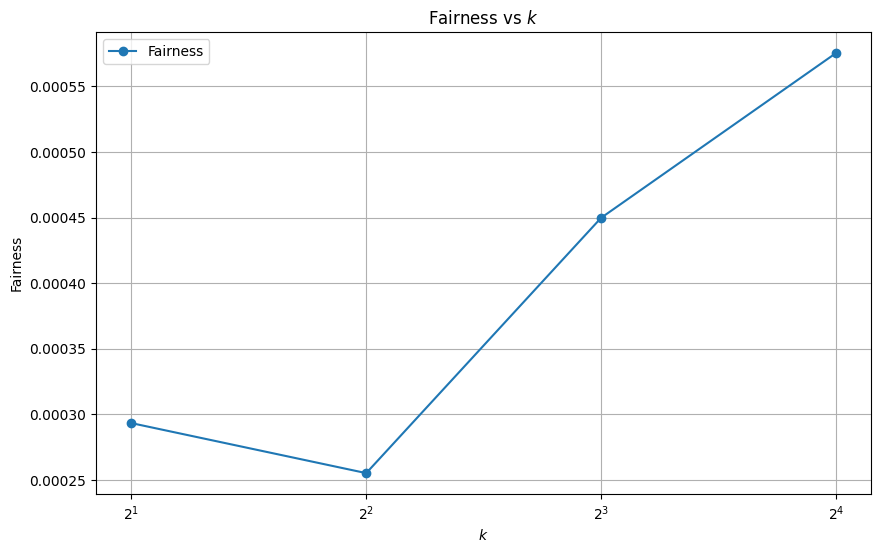

In [37]:
# Group by 'k' and calculate the mean fairness for filtered_equal_sample
fairness_by_k = filtered_equal_sample.groupby("k")["fairness"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(fairness_by_k.index, fairness_by_k.values, label="Fairness", marker='o')

# Add labels, title, and legend
plt.xlabel("$k$")
plt.ylabel("Fairness")
plt.title("Fairness vs $k$")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

## Halfspace

In [49]:
epsnet_sample = pd.read_csv("./epsnet/fair/dp_fair_epsnet_halfspace_sample.csv")
epsnet_sketch = pd.read_csv("./epsnet/fair/dp_fair_epsnet_halfspace_sketch_merge.csv")
epsnet_unfair = pd.read_csv("./epsnet/standard/epsnet_sample_results_halfspace.csv")

In [51]:
epsnet_sample["ratios"] = epsnet_sample["ratios"].apply(ast.literal_eval)
epsnet_sketch["ratios"] = epsnet_sketch["ratios"].apply(ast.literal_eval)

In [53]:
epsnet_sample["fairness"] = epsnet_sample.apply(
    lambda row: normal_distance(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)

epsnet_sketch["fairness"] = epsnet_sketch.apply(
    lambda row: normal_distance(np.array(row["ratios"]), np.array([row["red_points"], row["blue_points"]])), axis=1
)
epsnet_unfair["fairness"] = epsnet_unfair.apply(
    lambda row: normal_distance(np.array([0.5, 0.5]), np.array([row["red_points"], row["blue_points"]])), axis=1
)

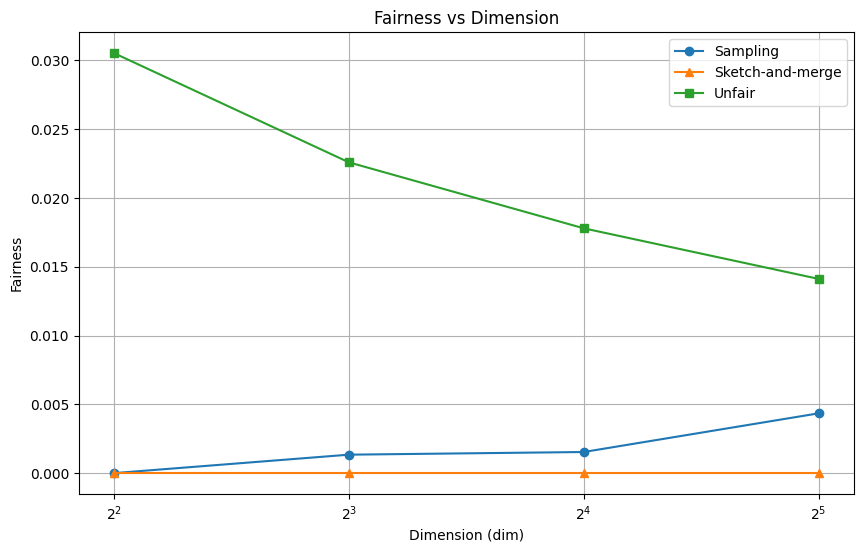

In [ ]:
# Group by 'dim' and calculate the mean fairness for each method
sample_fairness_by_dim = epsnet_sample.groupby("dim")["fairness"].mean()
sketch_fairness_by_dim = epsnet_sketch.groupby("dim")["fairness"].mean()
unfair_fairness_by_dim = epsnet_unfair.groupby("dim")["fairness"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_fairness_by_dim.index, sample_fairness_by_dim.values, label="Sampling", marker='o')
plt.plot(sketch_fairness_by_dim.index, sketch_fairness_by_dim.values, label="Sketch-and-merge", marker='^')
plt.plot(unfair_fairness_by_dim.index, unfair_fairness_by_dim.values, label="Unfair", marker='s')

# Add labels, title, and legend
plt.xlabel("Dimension (dim)")
plt.ylabel("Fairness")
plt.title("Fairness vs Dimension")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

## Fair HittingSet

In [106]:
fair_hittingset_rectangle = pd.read_csv("./hittingset/fair/fair_hitting_set_results_rectangle.csv")
fair_hittingset_halfspace = pd.read_csv("./hittingset/fair/fair_hitting_set_results_halfspace.csv")
unfair_hittingset_rectangle = pd.read_csv("./hittingset/standard/hittingset_results_rectangle.csv")
unfair_hittingset_halfspace = pd.read_csv("./hittingset/standard/hittingset_results_halfspace.csv")

In [107]:
# Convert the 'ratios' column from string to list
fair_hittingset_rectangle["ratios"] = fair_hittingset_rectangle["ratios"].apply(ast.literal_eval)
fair_hittingset_halfspace["ratios"] = fair_hittingset_halfspace["ratios"].apply(ast.literal_eval)

# Filter rows where 'ratios' is [50, 50]
fair_hittingset_rectangle = fair_hittingset_rectangle[
    fair_hittingset_rectangle["ratios"].apply(lambda x: x == [0.5, 0.5])
]
fair_hittingset_halfspace = fair_hittingset_halfspace[
    fair_hittingset_halfspace["ratios"].apply(lambda x: x == [0.5, 0.5])
]

In [108]:
fair_hittingset_rectangle["fairness"] = fair_hittingset_rectangle["ratios"].apply(
    lambda ratios: normal_distance(np.array(ratios), np.array([0.5, 0.5]))
)
fair_hittingset_halfspace["fairness"] = fair_hittingset_halfspace["ratios"].apply(
    lambda ratios: normal_distance(np.array(ratios), np.array([0.5, 0.5]))
)

In [109]:
unfair_hittingset_rectangle["fairness"] = unfair_hittingset_rectangle.apply(
    lambda row: normal_distance(np.array([0.5, 0.5]), np.array([row["red_points"], row["blue_points"]])), axis=1
)
unfair_hittingset_halfspace["fairness"] = unfair_hittingset_halfspace.apply(
    lambda row: normal_distance(np.array([0.5, 0.5]), np.array([row["red_points"], row["blue_points"]])), axis=1
)

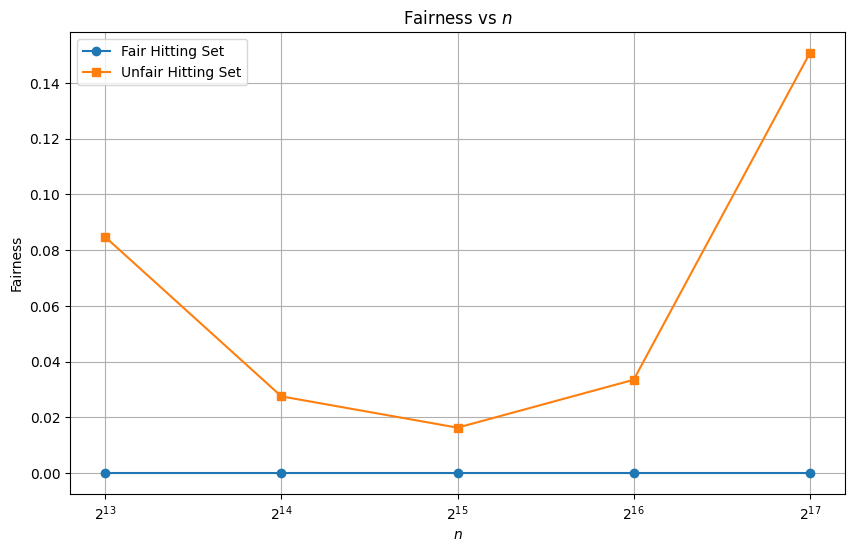

In [111]:
# Group by 'n' and calculate the mean fairness for each dataset
fair_fairness_by_n = fair_hittingset_rectangle.groupby("n")["fairness"].mean()
unfair_fairness_by_n = unfair_hittingset_rectangle.groupby("n")["fairness"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(fair_fairness_by_n.index, fair_fairness_by_n.values, label="Fair Hitting Set", marker='o')
plt.plot(unfair_fairness_by_n.index, unfair_fairness_by_n.values, label="Unfair Hitting Set", marker='s')

# Add labels, title, and legend
plt.xlabel("$n$")
plt.ylabel("Fairness")
plt.title("Fairness vs $n$")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

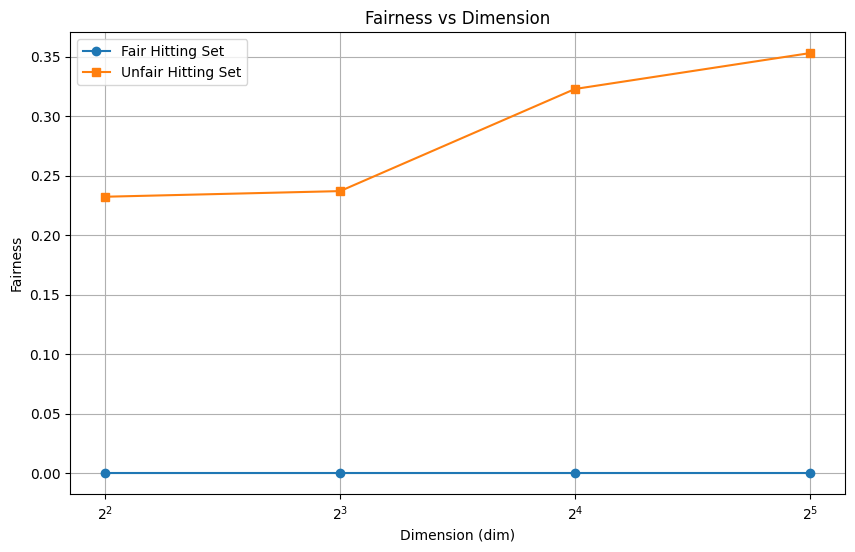

In [94]:
# Group by 'dim' and calculate the mean fairness for each dataset
fair_fairness_by_dim = fair_hittingset_halfspace.groupby("dim")["fairness"].mean()
unfair_fairness_by_dim = unfair_hittingset_halfspace.groupby("dim")["fairness"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(fair_fairness_by_dim.index, fair_fairness_by_dim.values, label="Fair Hitting Set", marker='o')
plt.plot(unfair_fairness_by_dim.index, unfair_fairness_by_dim.values, label="Unfair Hitting Set", marker='s')

# Add labels, title, and legend
plt.xlabel("Dimension (dim)")
plt.ylabel("Fairness")
plt.title("Fairness vs Dimension")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

In [96]:
fair_hittingset_rectangle["size"] = fair_hittingset_rectangle["red_points"] + fair_hittingset_rectangle["blue_points"]
fair_hittingset_halfspace["size"] = fair_hittingset_halfspace["red_points"] + fair_hittingset_halfspace["blue_points"]
unfair_hittingset_halfspace["size"] = unfair_hittingset_halfspace["red_points"] + unfair_hittingset_halfspace["blue_points"]
unfair_hittingset_rectangle["size"] = unfair_hittingset_rectangle["red_points"] + unfair_hittingset_rectangle["blue_points"]

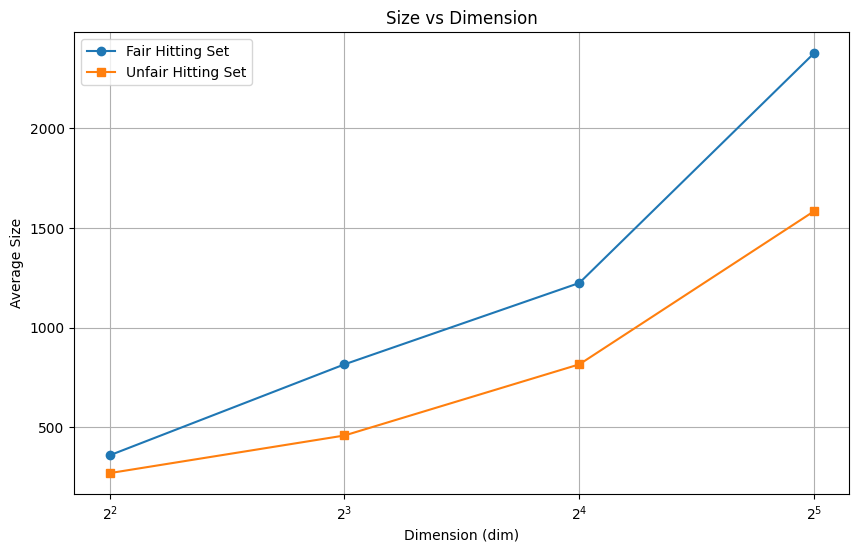

In [97]:
# Group by 'dim' and calculate the mean size for each dataset
fair_size_by_dim = fair_hittingset_halfspace.groupby("dim")["size"].mean()
unfair_size_by_dim = unfair_hittingset_halfspace.groupby("dim")["size"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(fair_size_by_dim.index, fair_size_by_dim.values, label="Fair Hitting Set", marker='o')
plt.plot(unfair_size_by_dim.index, unfair_size_by_dim.values, label="Unfair Hitting Set", marker='s')

# Add labels, title, and legend
plt.xlabel("Dimension (dim)")
plt.ylabel("Average Size")
plt.title("Size vs Dimension")
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

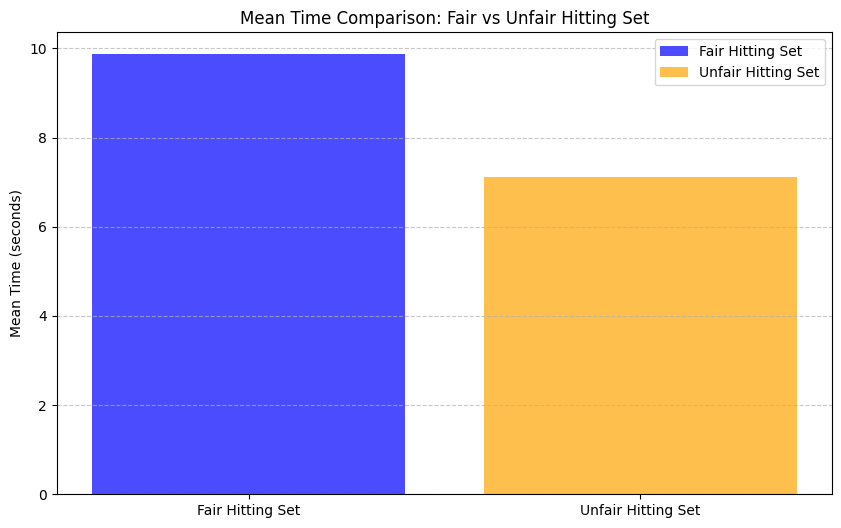

In [105]:
# Calculate the mean time for fair and unfair hitting sets
fair_mean_time = fair_hittingset_rectangle["time"].mean()
unfair_mean_time = unfair_hittingset_rectangle["time"].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(["Fair Hitting Set"], [fair_mean_time], label="Fair Hitting Set", alpha=0.7, color="blue")
plt.bar(["Unfair Hitting Set"], [unfair_mean_time], label="Unfair Hitting Set", alpha=0.7, color="orange")

# Add labels, title, and legend
plt.ylabel("Mean Time (seconds)")
plt.title("Mean Time Comparison: Fair vs Unfair Hitting Set")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

TODO: size vs k